In [17]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [18]:
df = pd.read_csv('motorcycle_toy_data')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27562 entries, 0 to 27561
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      27562 non-null  int64  
 1   title           27558 non-null  object 
 2   year            2313 non-null   float64
 3   price           26654 non-null  float64
 4   neighborhood    24588 non-null  object 
 5   description     27559 non-null  object 
 6   url             27562 non-null  object 
 7   model           27562 non-null  object 
 8   vin             9633 non-null   object 
 9   condition       16619 non-null  object 
 10  cryptocurrency  150 non-null    object 
 11  delivery        1642 non-null   object 
 12  engine_size     10821 non-null  float64
 13  fuel_type       25462 non-null  object 
 14  mileage         20065 non-null  float64
 15  color           17789 non-null  object 
 16  street legal    6261 non-null   object 
 17  title status    21732 non-null 

In [40]:
def df_cleaner(dataframe):
    for idx, i in enumerate(df['price']):
        if 200 < i < 300000 != True:
            print(idx)
            df.drop(idx, axis=0, inplace = True)
            
    for idx, i in enumerate(df['year']):
        if i == np.nan:
            df.drop(idx, inplace = True)

In [41]:
df_cleaner(df)

593


KeyError: '[593] not found in axis'

In [ ]:
df.info()

In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True)

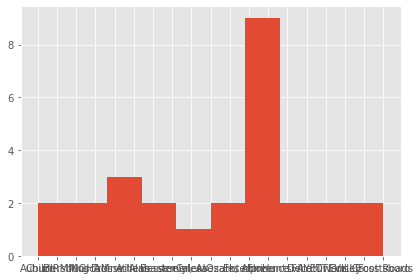

In [33]:
df['neighborhood'][:300:10].hist()
plt.tight_layout()

/home/eric/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/eric/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/eric/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/eric/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7cb3620850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7cb3626e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7cb3620890>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7cb362c910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7cb362ce10>],
 'means': []}

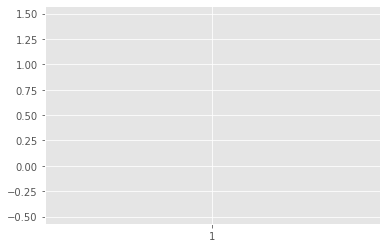

In [30]:
plt.boxplot(df['price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cbb88a5d0>,
      dtype=object)

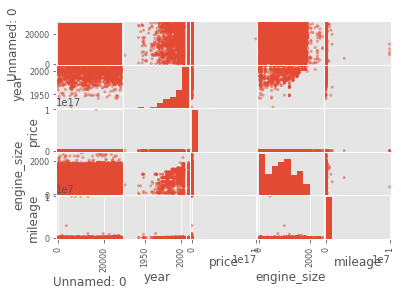

In [5]:
pd.plotting.scatter_matrix(df)

Text(0.5, 1.0, 'years plotted by row')

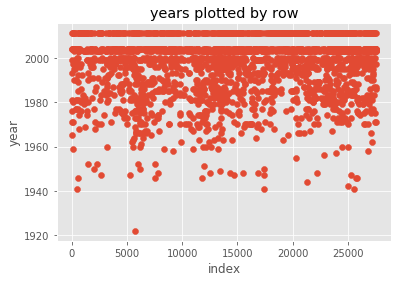

In [3]:
plt.scatter(df.index, df['year'])
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [5]:
for idx, _ in enumerate(df['year']):
    if _ > 2018:
        df['year'].replace(df['year'][idx], np.nan, inplace=True)
    elif _ < 1920:
        df['year'].replace(df['year'][idx], np.nan, inplace=True)
    else:
        pass

/home/eric/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/eric/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'years plotted by row')

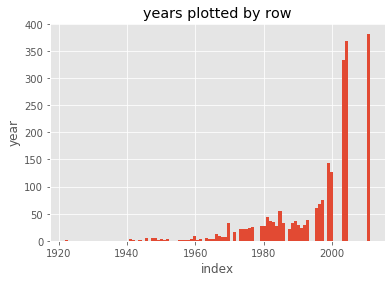

In [6]:
plt.hist(df['year'], 100)
    
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [8]:
year_real_mean = df['year'].mean()
year_real_mean

1995.8261997405966

In [10]:
df['year'].fillna(year_real_mean, inplace=True)

Text(0.5, 1.0, 'years plotted by row')

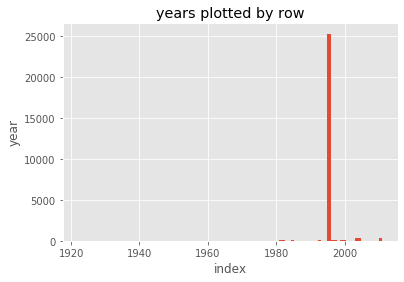

In [11]:
plt.hist(df['year'], 100)
    
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27562 entries, 0 to 27561
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      27562 non-null  int64  
 1   title           27558 non-null  object 
 2   year            27562 non-null  float64
 3   price           26654 non-null  float64
 4   neighborhood    24588 non-null  object 
 5   description     27559 non-null  object 
 6   url             27562 non-null  object 
 7   model           27562 non-null  object 
 8   vin             9633 non-null   object 
 9   condition       16619 non-null  object 
 10  cryptocurrency  150 non-null    object 
 11  delivery        1642 non-null   object 
 12  engine_size     10821 non-null  float64
 13  fuel_type       25462 non-null  object 
 14  mileage         20065 non-null  float64
 15  color           17789 non-null  object 
 16  street legal    6261 non-null   object 
 17  title status    21732 non-null 

In [59]:
for vin_ in df['vin']:
    if type(vin_) != np.nan:
        df['vin'].replace(vin_, 1, inplace=True)
    elif type(vin_) == np.nan:
        df['vin'].replace(vin_, 0, inplace=True)
    else:
        print(vin_)
        


KeyboardInterrupt: 

In [42]:
df['vin'].unique

array([nan, '1HFSC2205PA501856', '1HD1MAL16EB851071', ...,
       'JYAVP32E7EA004510', '1HD1GY411BC314015', 'JH2SC6107AK004688'],
      dtype=object)

In [53]:
type(np.nan)

float